In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

In [3]:
nx = 572
ny = 572


In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

In [5]:
x_test, y_test = generator(4)

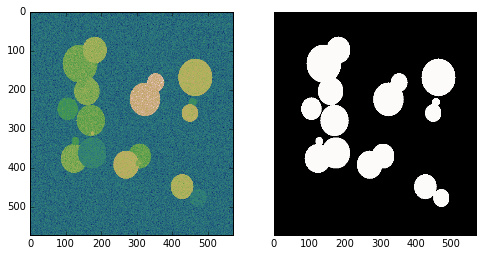

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2017-03-02 18:43:02,997 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [8]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [ ]:
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)

2017-03-02 18:43:10,018 Removing '/data/Projects/tf_unet/demo/prediction'
2017-03-02 18:43:10,051 Removing '/data/Projects/tf_unet/demo/unet_trained'
2017-03-02 18:43:10,053 Allocating '/data/Projects/tf_unet/demo/prediction'
2017-03-02 18:43:10,054 Allocating '/data/Projects/tf_unet/demo/unet_trained'
2017-03-02 18:43:31,003 Verification error= 85.4%, loss= 0.7195
2017-03-02 18:43:32,401 Start optimization
2017-03-02 18:43:53,303 Iter 0, Minibatch Loss= 0.6471, Training Accuracy= 0.7983, Minibatch error= 20.2%
2017-03-02 18:43:59,751 Iter 2, Minibatch Loss= 0.5440, Training Accuracy= 0.8710, Minibatch error= 12.9%
2017-03-02 18:44:06,586 Iter 4, Minibatch Loss= 0.5371, Training Accuracy= 0.7941, Minibatch error= 20.6%


In [ ]:
prediction = net.predict("./unet_trained/model.cpkt", x_test)

In [ ]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,8))
for i in range(ax.shape[0]):
    ax[i, 0].imshow(x_test[i,...,0], aspect="auto")
    ax[i, 1].imshow(y_test[i,...,1], aspect="auto")
    mask = prediction[i,...,1] > 0.9
    ax[i, 2].imshow(mask, aspect="auto")
ax[0, 0].set_title("Input")
ax[0, 1].set_title("Ground truth")
ax[0, 2].set_title("Prediction")
fig.tight_layout()
fig.savefig("docs/toy_problem.png")